## Importing Dependencies

- `numpy` with alias `np`: used for numerical computing
- `librosa`: used for audio analysis
- `librosa.display`: used for displaying audio data
- `matplotlib.pyplot` with alias `plt`: used for plotting and visualizing data

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
SAMPLE_RATIO = 22050
FIG_SIZE = (20,10)
AUDIO_PATH = "test.wav"

In [3]:
# load audio file with Librosa
signal, sample_rate = librosa.load(AUDIO_PATH, sr=SAMPLE_RATIO)
print(f'signal shape: {signal.shape} and its type: {signal.dtype}')

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=signal, sr=SAMPLE_RATIO)
print(f'Tempo of music: {tempo} and no. of beat frame: {len(beat_frames)}')

signal shape: (1175040,) and its type: float32
Tempo of music: 123.046875 and no. of beat frame: 108


Text(0.5, 1.0, 'Waveform')

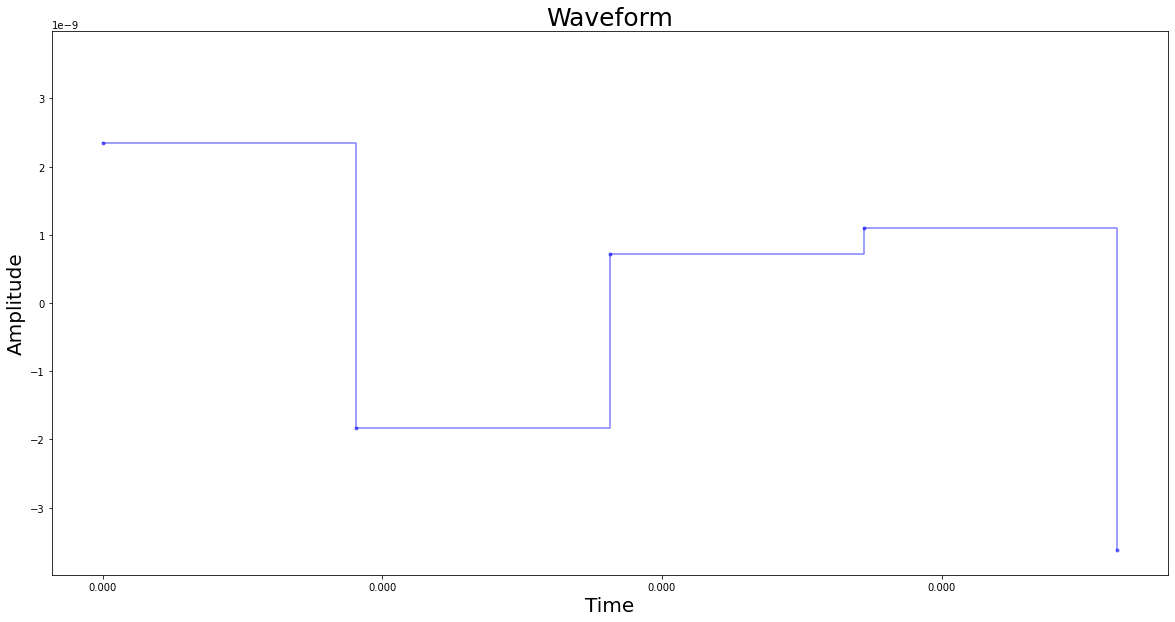

In [4]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(y=signal[:5], sr=sample_rate, marker='.', color='b', alpha=0.5)
plt.xlabel("Time", fontdict={"size": 20})
plt.ylabel("Amplitude", fontdict={"size": 20})
plt.title("Waveform", fontdict={"size": 25})

In [5]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)
print(f'shape of signal after fft: {fft.shape} and its type: {fft.dtype}')

shape of signal after fft: (1175040,) and its type: complex128


## Spectrum
a spectrum refers to the decomposition of a signal into its constituent frequencies. It is a representation of the frequency content of a signal, and is often used to analyze signals in different domains, such as time and frequency.

In music analysis, spectrum refers to the harmonic content of a sound, or the set of frequencies that make up a musical tone. It can be used to analyze the timbre or tone color of a sound, and to identify specific frequencies or overtones that contribute to the overall sound. By analyzing the spectrum of different musical instruments or voices, it is possible to identify characteristic features and differences between them. Spectrum analysis is also commonly used in music production and audio engineering to shape and modify the frequency content of a sound.

In [6]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
print(f'shape of absolute value of fft: {spectrum.shape} and its type: {spectrum.dtype}')

shape of absolute value of fft: (1175040,) and its type: float64


Text(0.5, 1.0, 'Waveform')

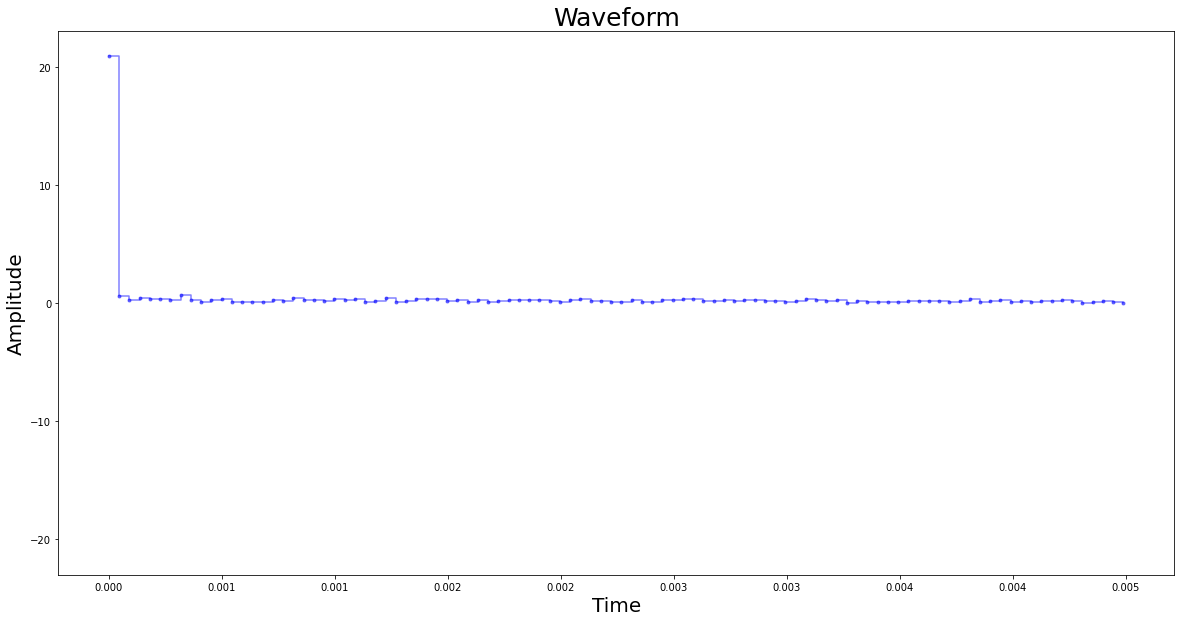

In [9]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(y=spectrum[:100], sr=sample_rate, marker='.', color='b', alpha=0.5)
plt.xlabel("Time", fontdict={"size": 20})
plt.ylabel("Amplitude", fontdict={"size": 20})
plt.title("Waveform", fontdict={"size": 25})

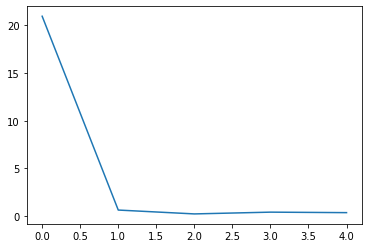

In [58]:
plt.plot(spectrum[:5])

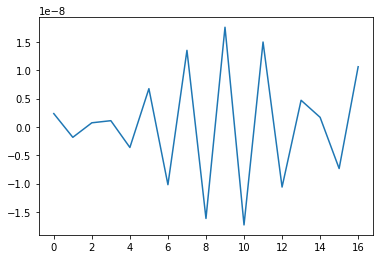

In [53]:
plt.plot(y[:17])

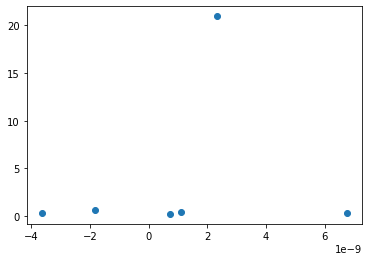

In [51]:
plt.scatter(y[:6], spectrum[:6], cmap='gray')

Text(0.5, 1.0, 'Waveform')

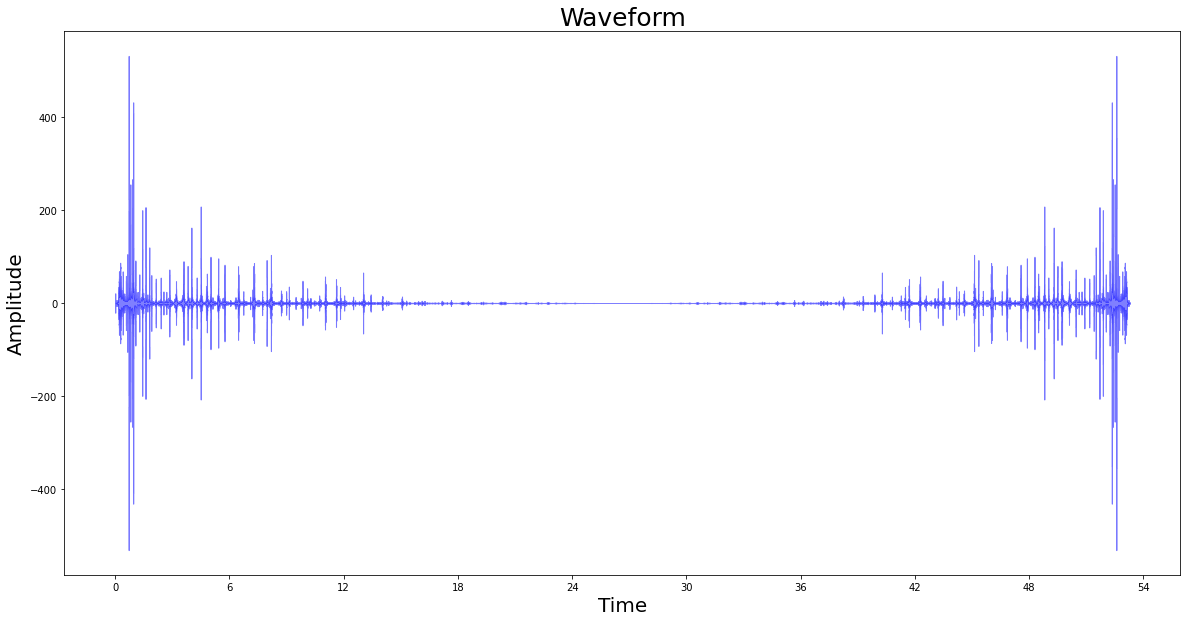

In [46]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(y=spectrum, sr=sample_rate, marker='.', color='b', alpha=0.5)
plt.xlabel("Time", fontdict={"size": 20})
plt.ylabel("Amplitude", fontdict={"size": 20})
plt.title("Waveform", fontdict={"size": 25})

In [20]:
# create frequency variable with uniform steps
f = np.linspace(0, sample_rate, len(spectrum))
print(f'shape of frequency variable: {f.shape} and its type: {f.dtype}')

shape of frequency variable: (1175040,) and its type: float64


Text(0.5, 1.0, 'Power spectrum')

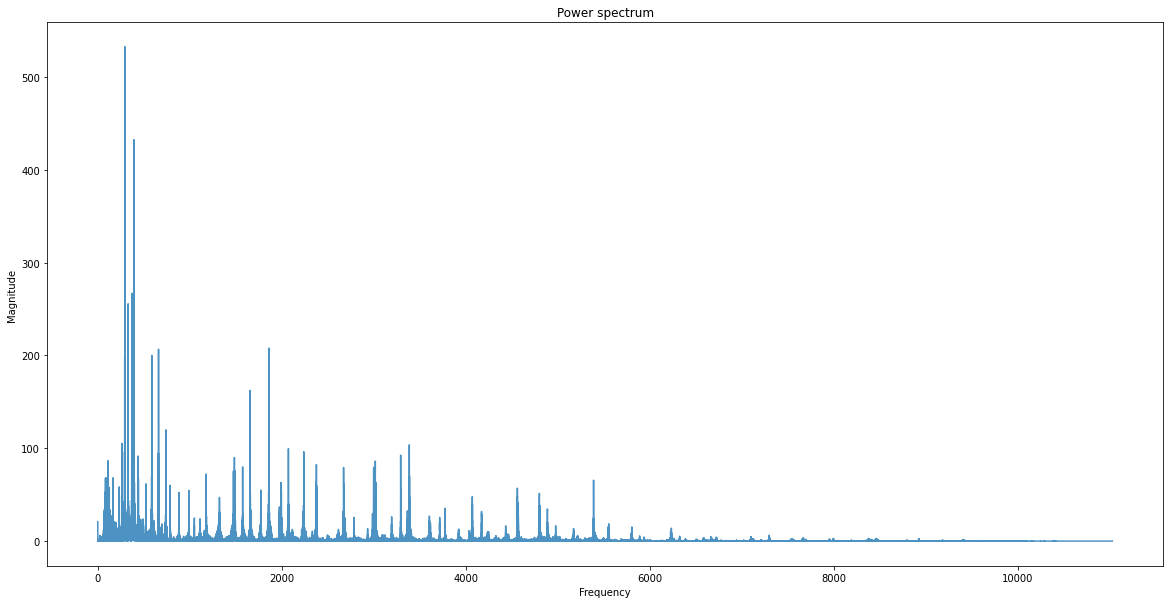

In [21]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.8)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [22]:
# Short-Time-Fourier-Transform(STFT) -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print(f"STFT hop length duration is: {hop_length_duration: .5f}s")
print(f"STFT window duration is: {n_fft_duration: .5f}s")

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
print(f'shape of signal after stft: {stft.shape} and its type: {stft.dtype}')

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
print(f'shape of signal after spectrogram: {spectrogram.shape} and its type: {spectrogram.dtype}')

STFT hop length duration is:  0.02322s
STFT window duration is:  0.09288s
shape of signal after stft: (1025, 2296) and its type: complex64
shape of signal after spectrogram: (1025, 2296) and its type: float32


Text(0.5, 1.0, 'Spectrogram')

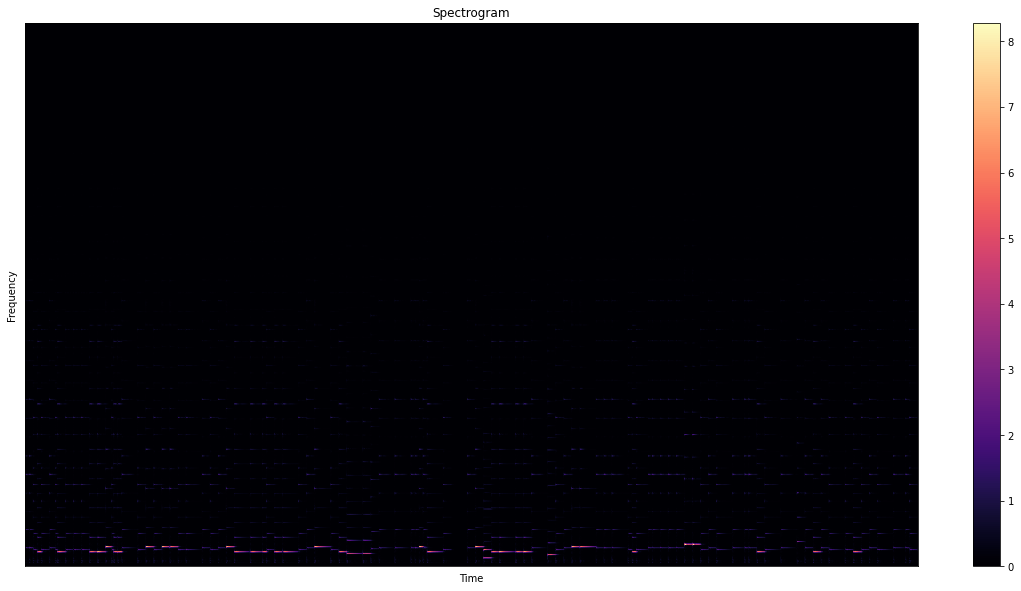

In [24]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

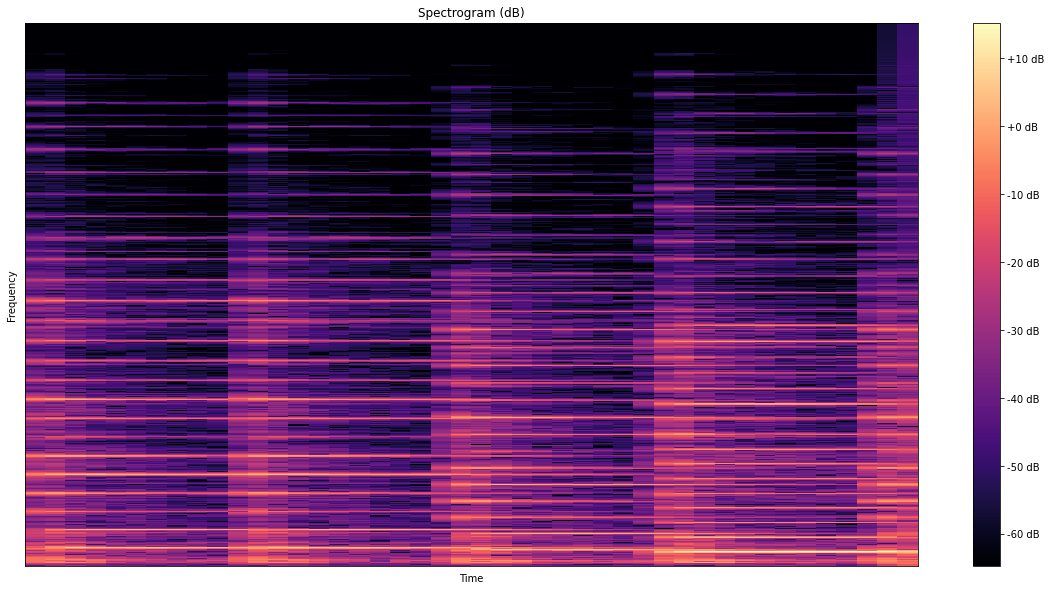

In [67]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

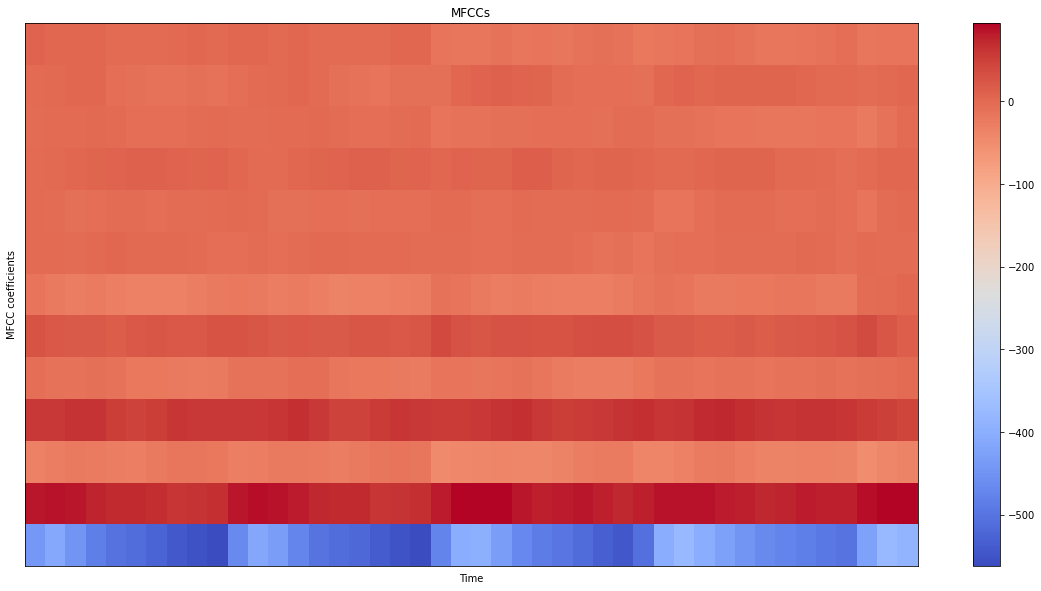

In [68]:

# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()


In [21]:
librosa.feature.melspectrogram(y=signal, sr=SAMPLE_RATIO, hop_length=hop_length)

array([[8.1529244e-05, 9.0570931e-05, 3.5263711e-05, ..., 7.1204081e-06,
        2.8948216e-06, 2.7099997e-05],
       [1.3572979e-03, 2.1373015e-03, 1.4625432e-03, ..., 1.9677312e-04,
        8.2865030e-05, 2.4056544e-05],
       [8.7710600e-03, 2.3578396e-02, 1.7159946e-02, ..., 4.0598391e-04,
        1.8357615e-04, 2.5984124e-05],
       ...,
       [9.4709890e-08, 1.8442638e-07, 6.4021975e-08, ..., 2.9044778e-10,
        3.2056288e-10, 3.6790935e-09],
       [7.1801964e-09, 1.2588981e-08, 3.9433603e-09, ..., 2.2766095e-11,
        4.6779025e-11, 2.6105609e-09],
       [1.8557770e-11, 2.1947548e-11, 7.3814453e-12, ..., 2.2008368e-13,
        1.9281299e-11, 2.3444604e-09]], dtype=float32)

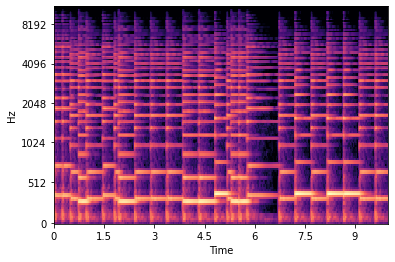

In [23]:
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length
                         )